In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [15]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [16]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [17]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


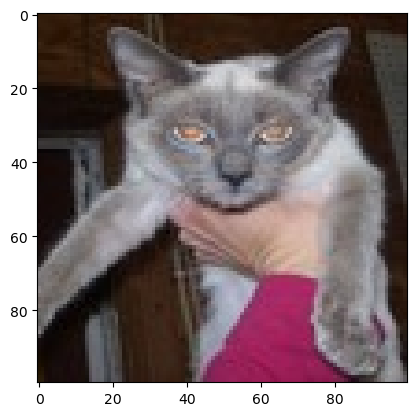

In [18]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [19]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))

model.add(Conv2D(32, (3,3), activation = 'relu'))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [20]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 601ms/step - accuracy: 0.5405 - loss: 1.4654
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 603ms/step - accuracy: 0.6635 - loss: 0.6243
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 715ms/step - accuracy: 0.7745 - loss: 0.4903
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 690ms/step - accuracy: 0.8690 - loss: 0.3320
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 708ms/step - accuracy: 0.9495 - loss: 0.1778
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 721ms/step - accuracy: 0.9880 - loss: 0.0819
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 960ms/step - accuracy: 0.9965 - loss: 0.0346
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 710ms/step - accuracy: 0.9995 - loss: 0.0130
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 640ms/step - accuracy: 1.0000 - loss: 0.0059
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 710ms/step - accuracy: 1.0000 - loss: 0.0030


In [35]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 4s 149ms/step - loss: 0.9762 - accuracy: 0.6550


[0.9762333631515503, 0.6549999713897705]

# Making predictions

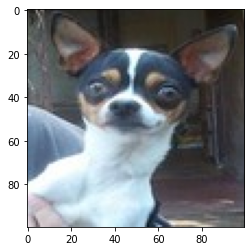

Our model says it is a : dog


In [43]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)